In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.drop(columns="State", inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

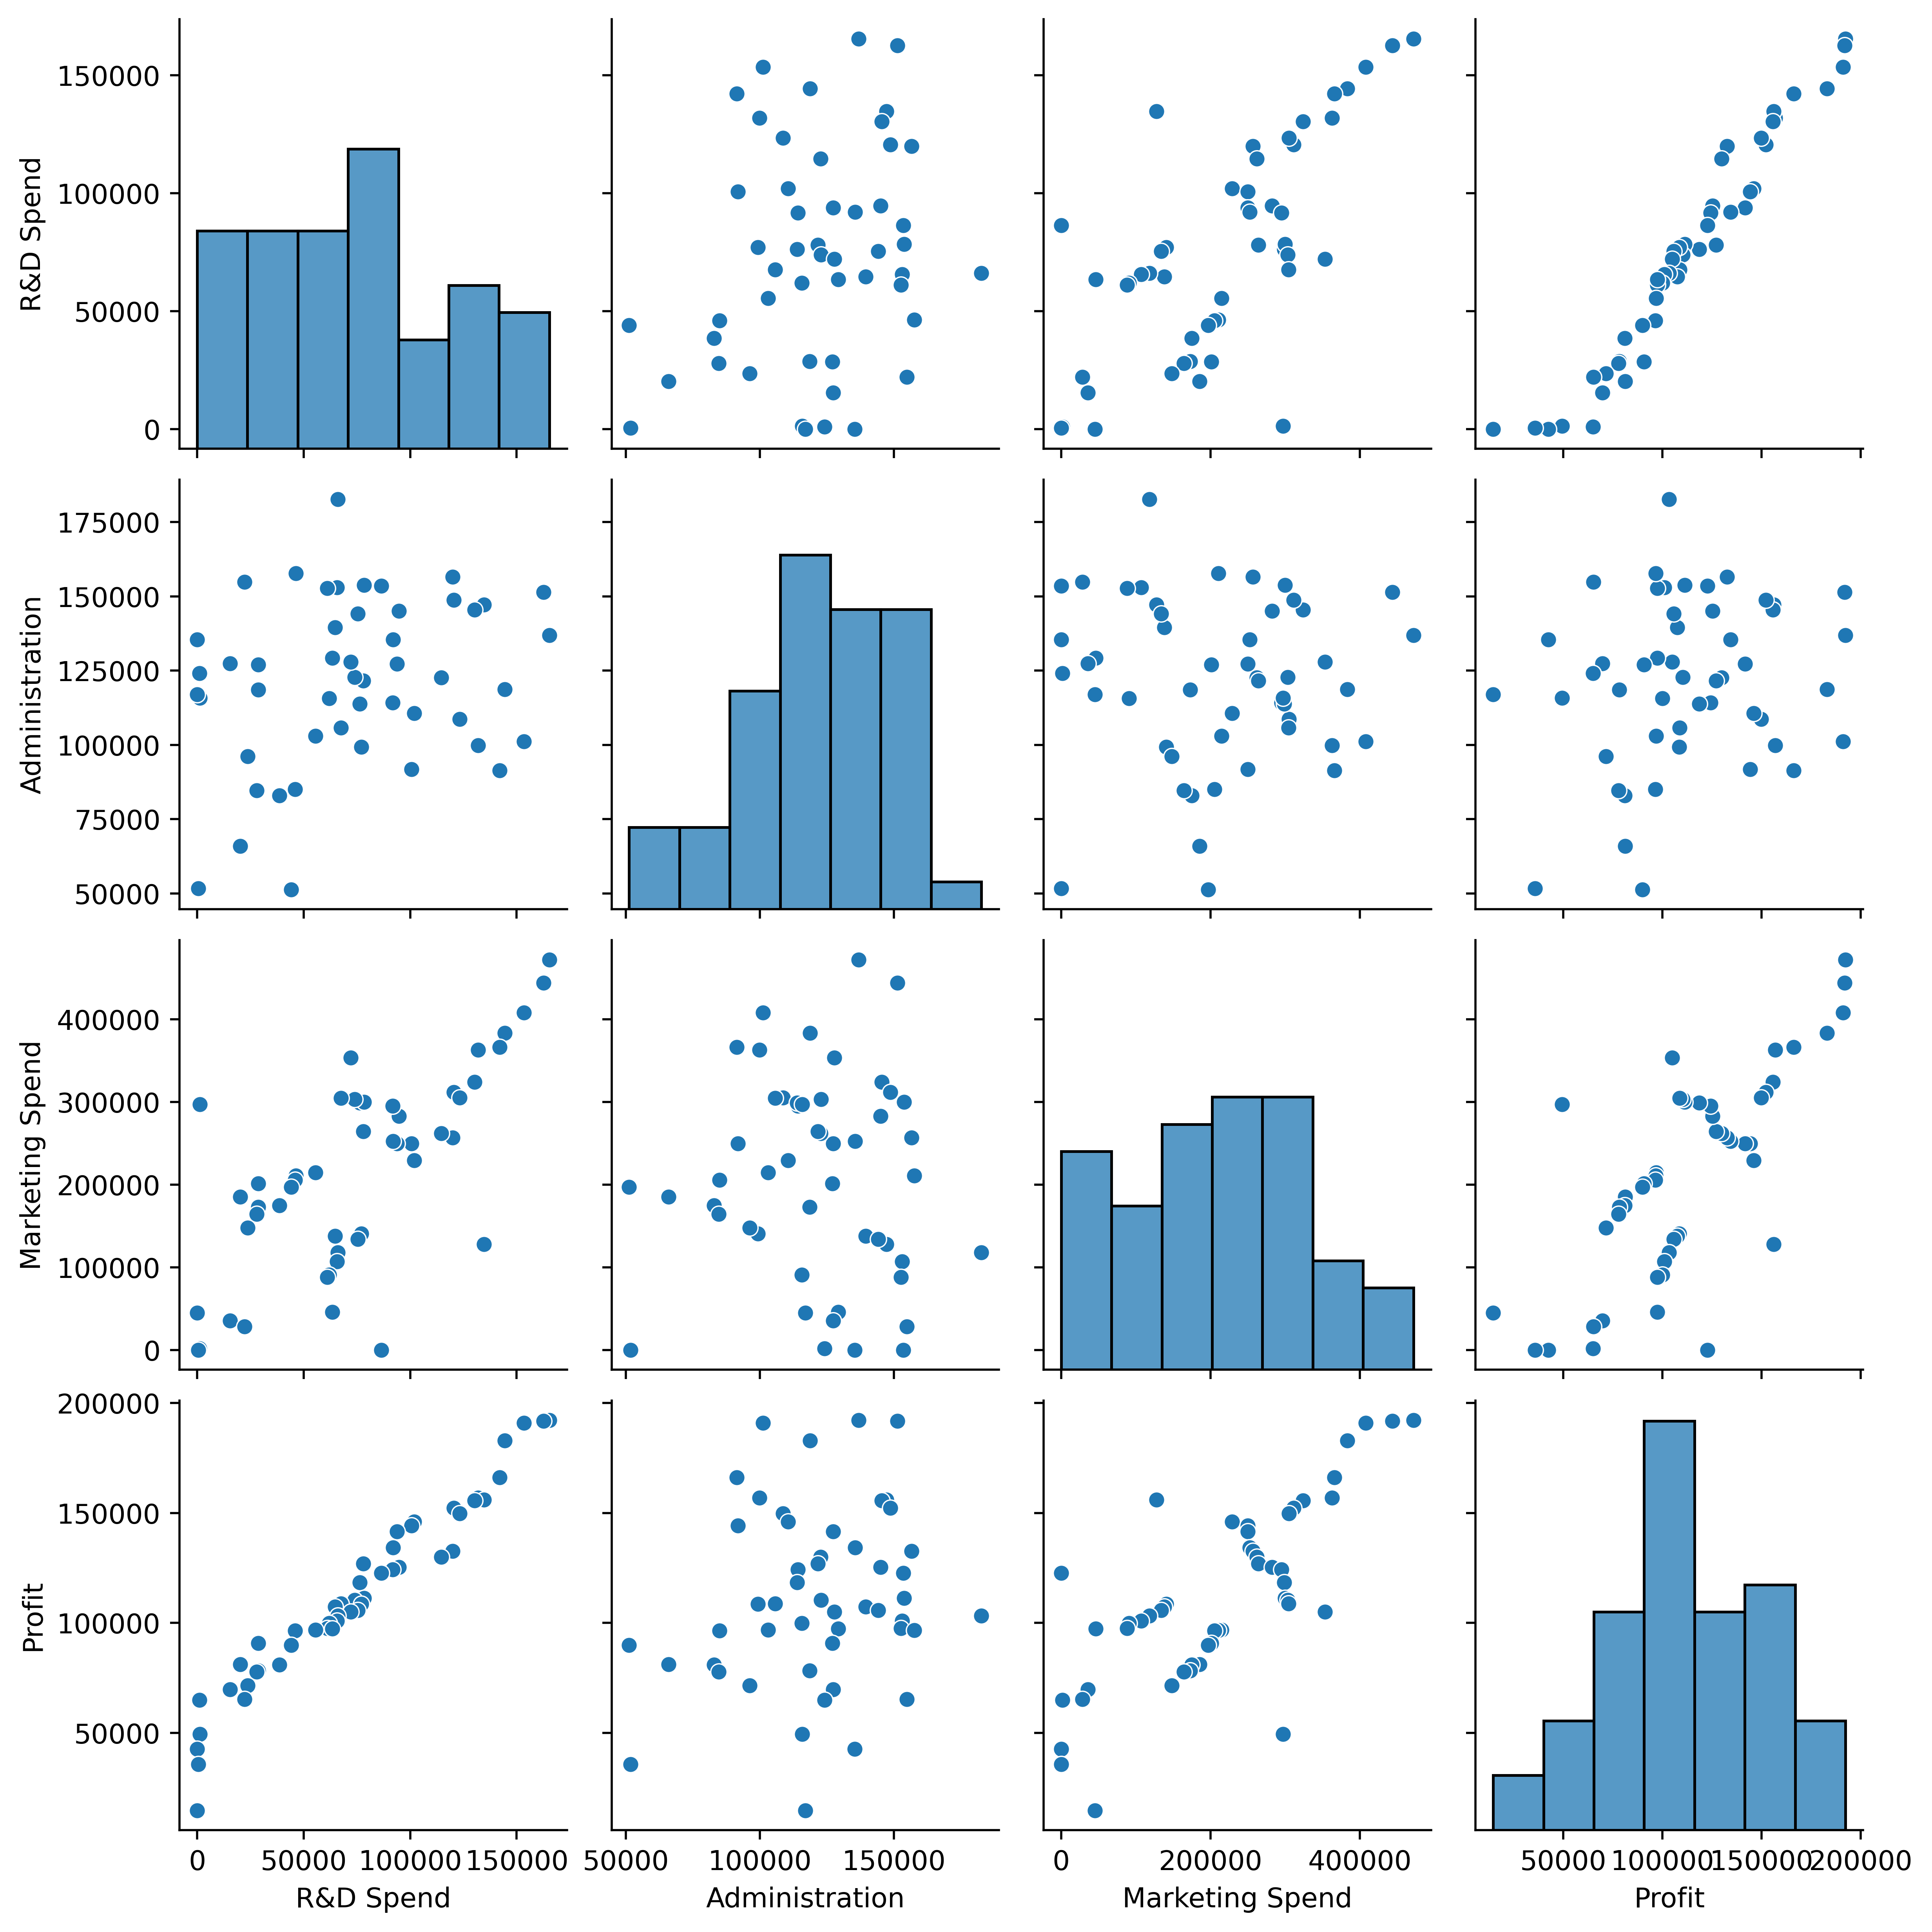

In [7]:
sns.pairplot(df)

<Axes: >

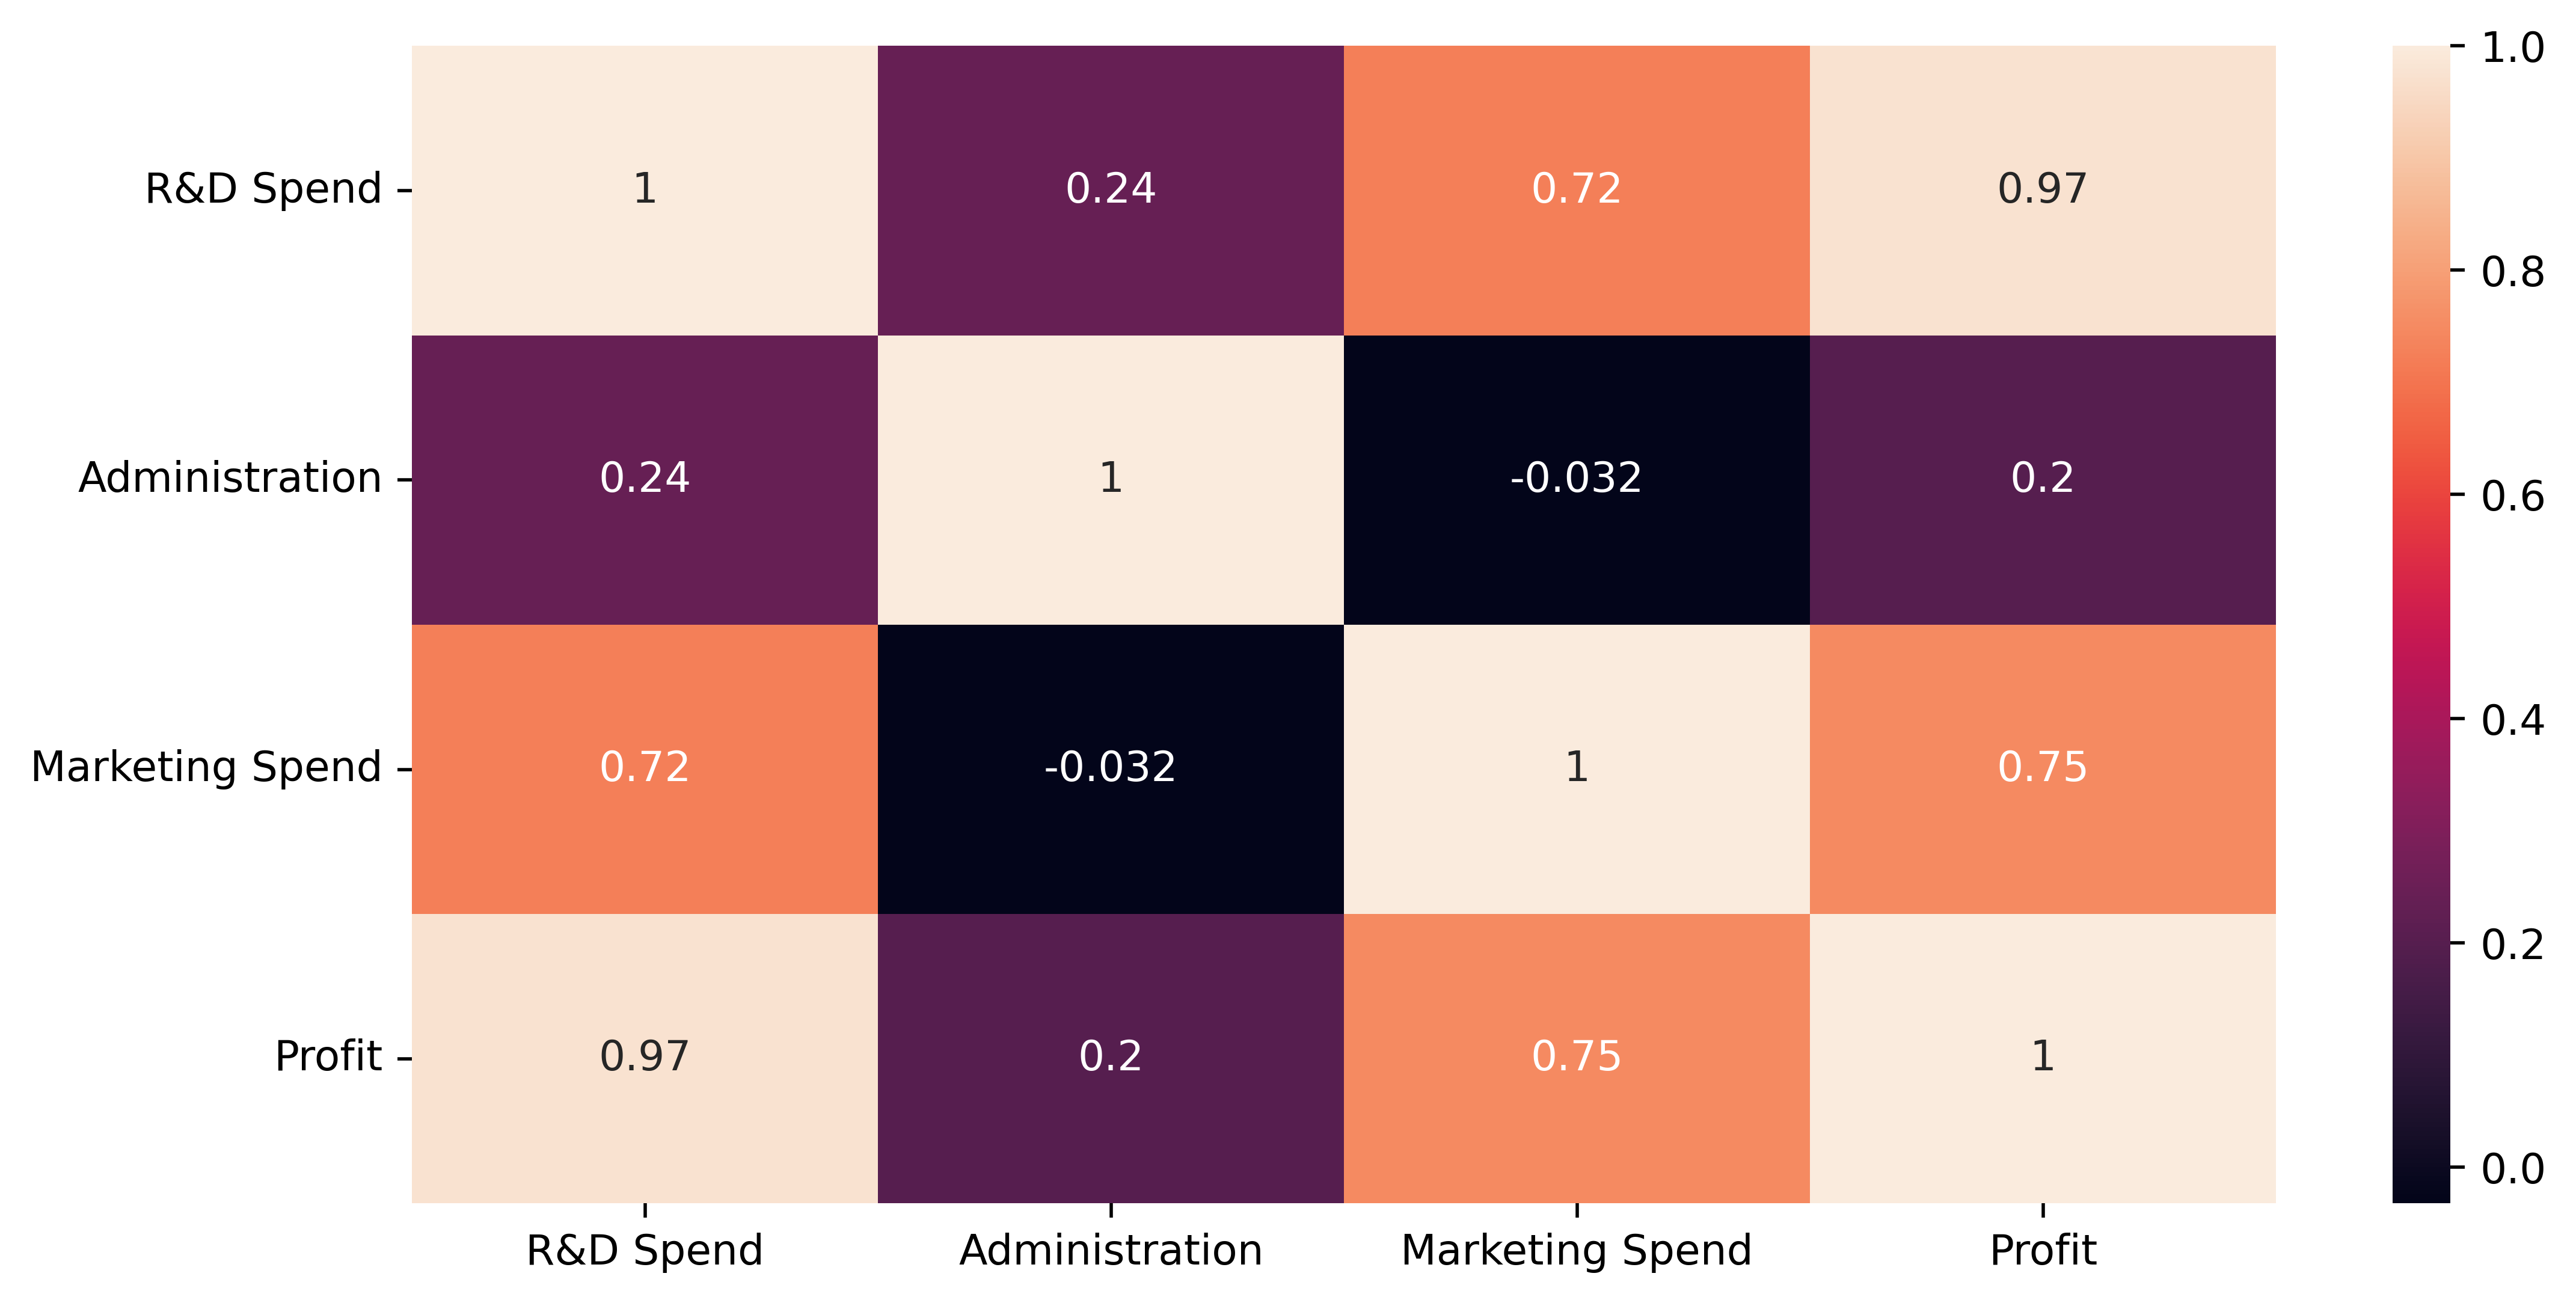

In [8]:
sns.heatmap(df.corr(), annot = True)

<Axes: >

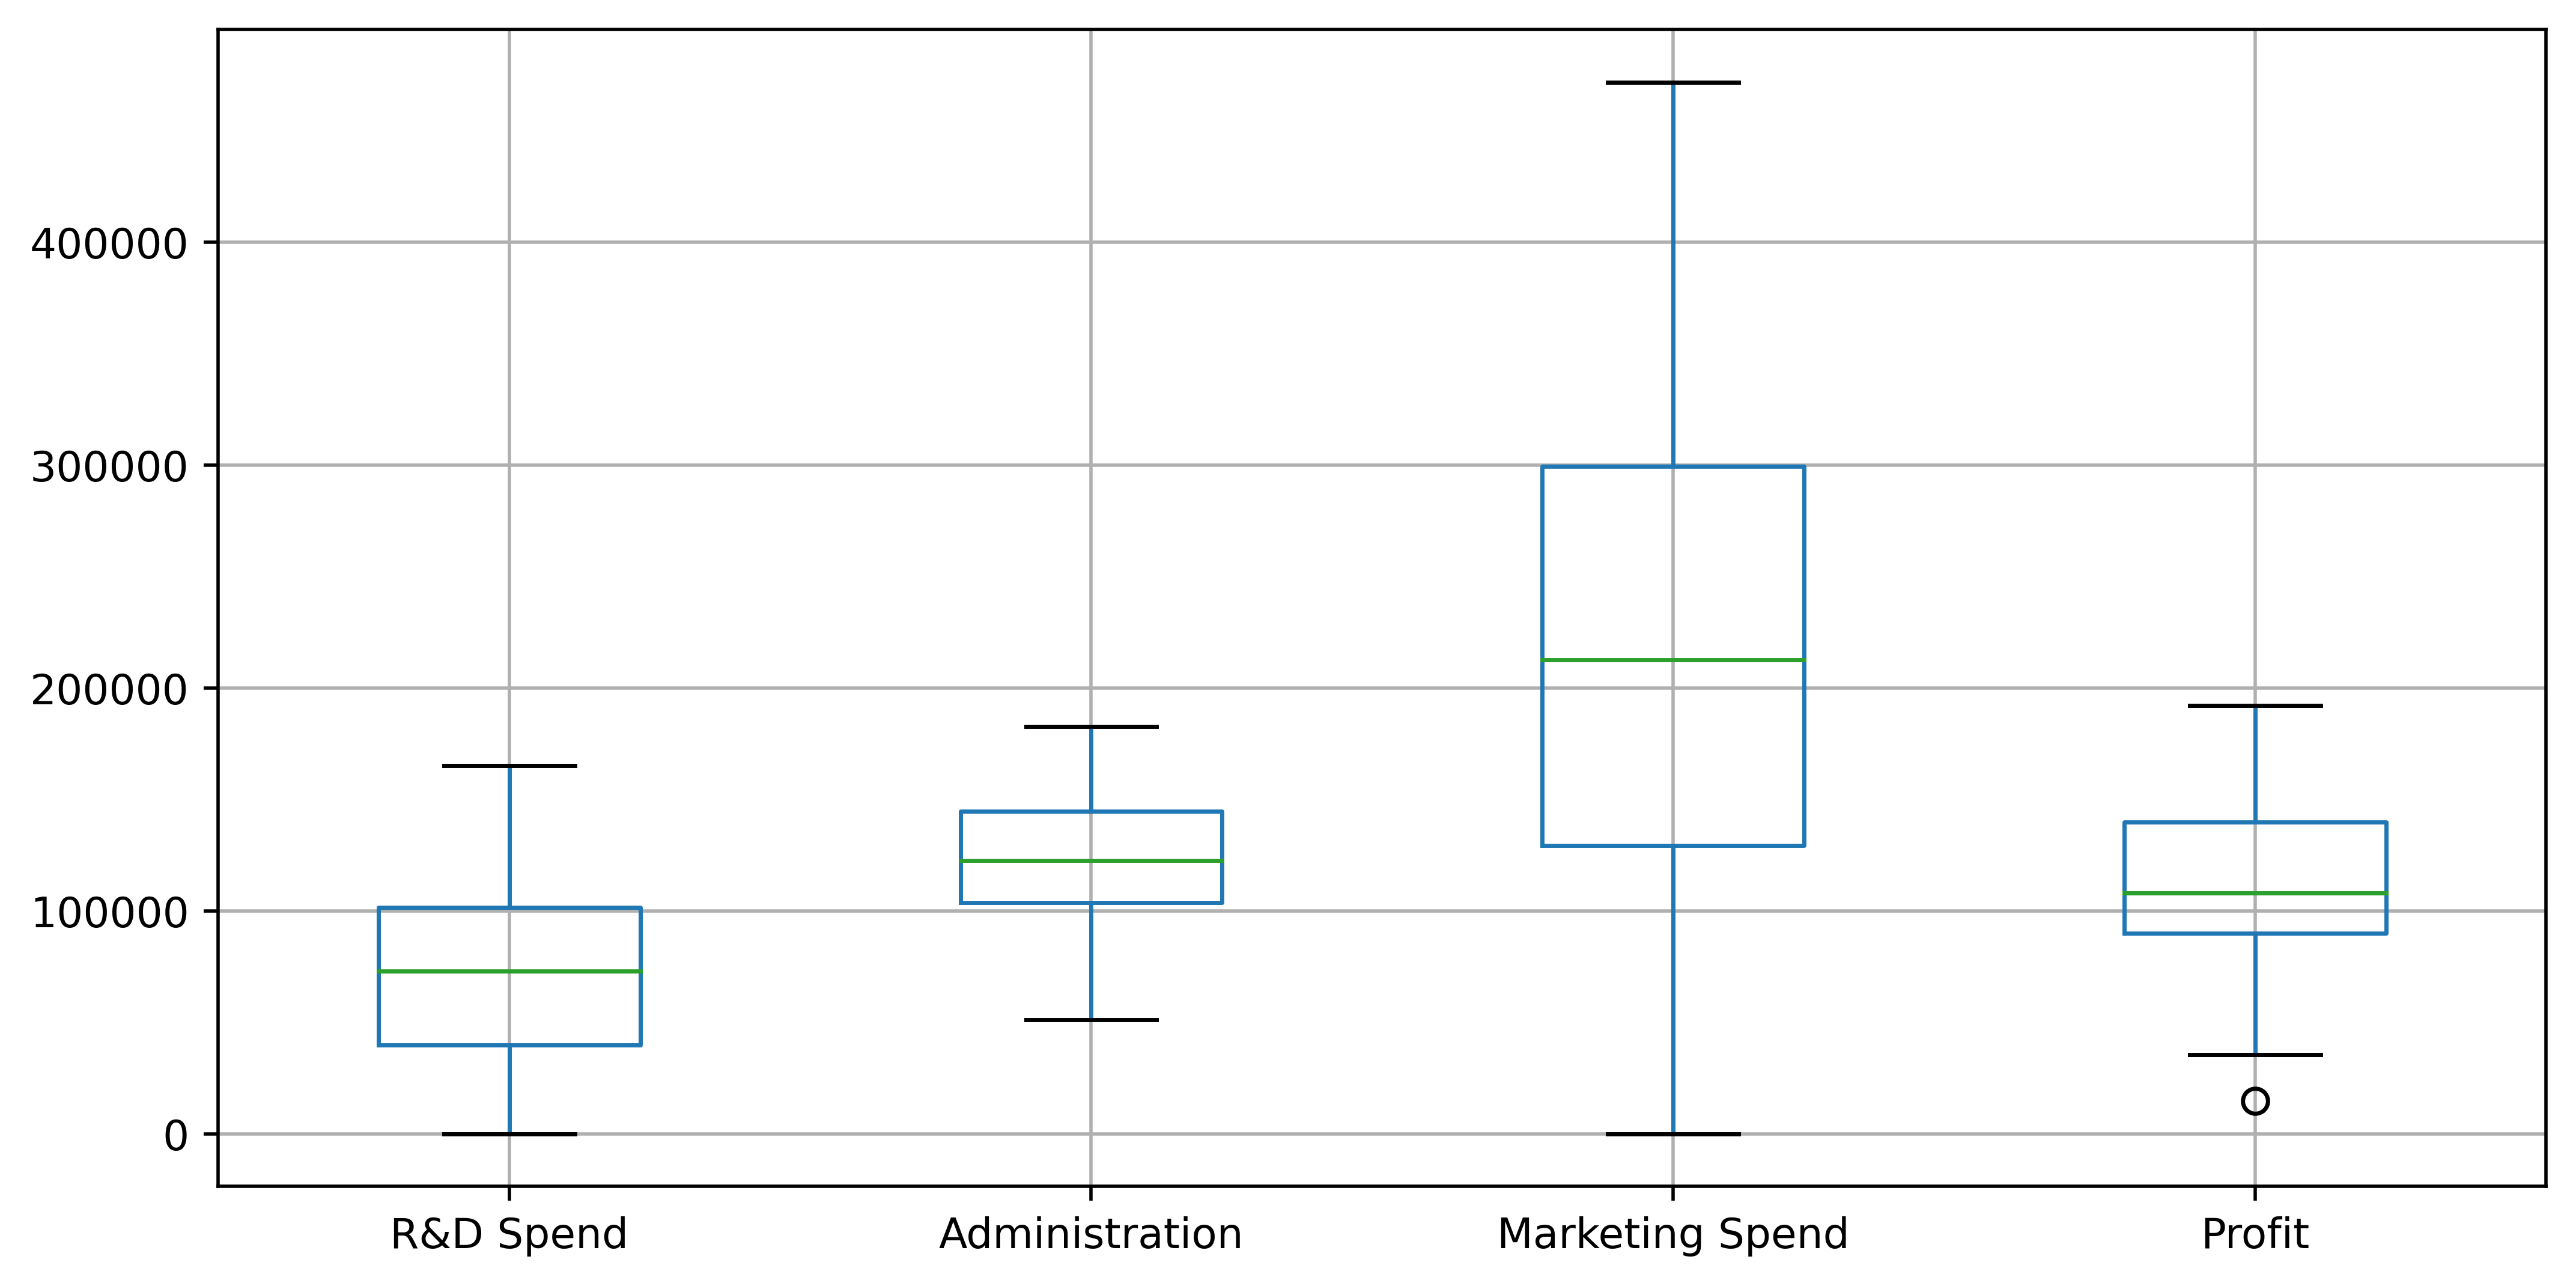

In [9]:
df.boxplot()

In [10]:
df.rename(columns = {
    "Marketing Spend" : "Marketing",
    "R&D Spend" : "RND"
}, inplace = True)

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols("Profit ~ RND + Administration + Marketing", data = df).fit()

In [13]:
model.pvalues

Intercept         1.057379e-09
RND               2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
data = df.drop(columns="Profit")

In [16]:
data.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [17]:
vif = pd.DataFrame()

In [18]:
vif["Features"] = data.columns

In [19]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [20]:
vif

,Features,VIF
0,RND,8.384571
1,Administration,4.026406
2,Marketing,7.593984


In [21]:
model_rnd = smf.ols("Profit ~ RND + Administration", data = df).fit()
model_rnd.rsquared

0.9478129385009173

In [22]:
model_m = smf.ols("Profit ~ Administration + Marketing", data = df).fit()
model_m.rsquared

0.6097229746770663

In [23]:
final_model = smf.ols("Profit ~ RND + Administration", data = df).fit()
final_model.rsquared

0.9478129385009173